# 18 

In [148]:
bytes = []

with open("input.txt", "r") as file: 
    for line in file:
        bytes.append([int(a) for a in line.strip().split(',')])

bytes; 

In [149]:
N = 71

start = (0,0)
end = (N-1,N-1)

array = [['.' for _ in range(N)] for _ in range(N)]

for byte in bytes[:1024]: 
    array[byte[1]][byte[0]] = '#'

array;

In [150]:
import matplotlib.pyplot as plt

print_array = [[0 for _ in range(N)] for _ in range(N)]
for row in range(N):
    for col in range(N):
        if array[row][col] == "#":
            print_array[row][col] = 1 

(-0.5, 70.5, 70.5, -0.5)

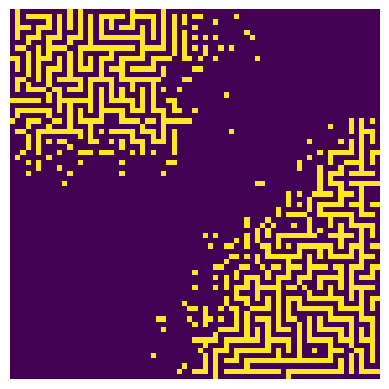

In [151]:
plt.imshow(print_array)
plt.axis("off") # Is it really so that BFS fails on such a small number of nodes? 

In [152]:
from heapq import heappush, heappop

# Run Dijkstra from both sides?  

def dijkstra(array, steps = -1): 
    # Use heap for this as (score, node) pairs. 
    start = (0, 0)
    current = [(0, start)] 

    MAX_DISTANCE = len(array) * len(array[0]) + 1

    # Store the distances here. 
    distances = [[MAX_DISTANCE for _ in range(len(array[0]))] for _ in range(len(array))]
    distances[start[0]][start[1]] = 0

    # Dijsktras algorithm.
    while len(current) > 0 and steps != 0: 
        distance, node = heappop(current)

        if node == (len(array) - 1, len(array[0]) - 1):
            break # BREAK EARLY


        # Insert new neighbor
        neighbors = [(node[0] + 1, node[1]), 
                    (node[0] - 1, node[1]), 
                    (node[0], node[1] + 1), 
                    (node[0], node[1] - 1)] # R -> rotat
        
        for neighbor in neighbors:

            # Out of bounds
            if neighbor[0] < 0 or neighbor[0] >= len(array) or neighbor[1] < 0 or neighbor[1] >= len(array[0]):
                continue

            # Wall
            if array[neighbor[0]][neighbor[1]] == "#":
                continue

            cost = 1
        
            # Add new path
            if distance + cost < distances[neighbor[0]][neighbor[1]]:
                distances[neighbor[0]][neighbor[1]] = distance + cost
                heappush(current, (distance + cost, neighbor))

        # Limit execution
        if steps != -1: 
            steps -= 1

    # for printing
    for row in range(len(array)):
        for col in range(len(array[0])):
            if distances[row][col] == MAX_DISTANCE:
                distances[row][col] = -1
    return distances

(-0.5, 70.5, 70.5, -0.5)

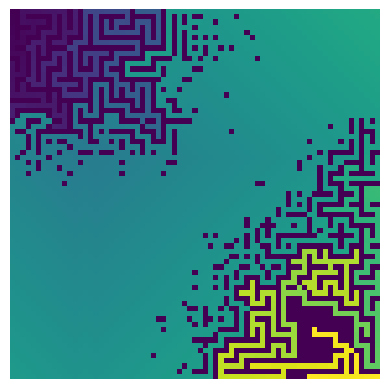

In [153]:
plt.imshow(dijkstra(array, -1))
plt.axis("off") # Is it really so that BFS fails on such a small number of nodes?

# Part 2: 

In [154]:
bytes = []

with open("input.txt", "r") as file: 
    for line in file:
        bytes.append(tuple([int(a) for a in line.strip().split(',')]))

bytes;

In [142]:
N = 71

start = (0,0)
end = (N-1,N-1)

array = [['.' for _ in range(N)] for _ in range(N)]

#for byte in bytes[:20]: 
#    array[byte[1]][byte[0]] = '#'

#array

In [143]:
def backtrack(distances): 
    current = (len(distances) - 1, len(distances[0]) - 1)
    path = [current]
    while current != (0,0): 
        neighbors = [(current[0] + 1, current[1]), 
                    (current[0] - 1, current[1]), 
                    (current[0], current[1] + 1), 
                    (current[0], current[1] - 1)] # R -> rotat
        
        for neighbor in neighbors:
            if neighbor[0] < 0 or neighbor[0] >= len(distances) or neighbor[1] < 0 or neighbor[1] >= len(distances[0]):
                continue

            if distances[neighbor[1]][neighbor[0]] == distances[current[1]][current[0]] - 1:
                path.append(neighbor)
                current = neighbor
                break
    return path

In [ ]:
array = [['.' for _ in range(N)] for _ in range(N)]
path = backtrack(dijkstra(array, -1))

# Only recompute the shortest path if the byte is in the latest shortest path.
for byte in bytes: 
    array[byte[1]][byte[0]] = '#'

    if byte in path:
        print("Byte in path:", byte)
        #print(''.join([''.join(line+['\n']) for line in array]))
        distances = dijkstra(array, -1)
        if distances[len(array) - 1][len(array[0]) - 1] == -1:
            print("No path found at byte:", byte)
            break
        
        path = backtrack(distances)

Byte in path: (0, 17)
Byte in path: (3, 17)
Byte in path: (4, 19)
Byte in path: (4, 17)
Byte in path: (5, 17)
Byte in path: (6, 23)
Byte in path: (7, 22)
Byte in path: (39, 70)
Byte in path: (11, 26)
Byte in path: (6, 19)
Byte in path: (9, 23)
Byte in path: (53, 70)
Byte in path: (1, 1)
Byte in path: (45, 60)
Byte in path: (42, 47)
Byte in path: (50, 67)
Byte in path: (57, 69)
Byte in path: (0, 9)
Byte in path: (53, 67)
Byte in path: (54, 59)
Byte in path: (63, 68)
Byte in path: (51, 52)
Byte in path: (8, 21)
Byte in path: (2, 13)
Byte in path: (54, 55)
Byte in path: (49, 53)
Byte in path: (66, 65)
Byte in path: (61, 37)
Byte in path: (55, 56)
Byte in path: (7, 20)
Byte in path: (64, 39)
Byte in path: (12, 5)
Byte in path: (8, 7)
Byte in path: (68, 31)
Byte in path: (35, 20)
Byte in path: (25, 28)
Byte in path: (47, 20)
Byte in path: (48, 21)
Byte in path: (45, 22)
Byte in path: (63, 20)
Byte in path: (41, 28)
Byte in path: (49, 21)
Byte in path: (65, 20)
Byte in path: (43, 28)
Byte in